In [1]:
import pandas as pd

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report




# For visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

# Random state

r=2

# For bagging, forest and boost
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier



In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# You can also drop whichever other columns you'd like here
titanic_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

### One-Hot Encoding

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# One hot encode sex columns
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,False,True
1,2,1,1,38.0,1,0,71.2833,C,True,False
2,3,1,3,26.0,0,0,7.9250,S,True,False
3,4,1,1,35.0,1,0,53.1000,S,True,False
4,5,0,3,35.0,0,0,8.0500,S,False,True


In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [8]:
# Assign x and y 
y = titanic_df['Survived']
X = titanic_df.iloc[:,2:12]

# Make training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
 test_size=0.2, random_state=r)

# Split training set into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full,
 y_train_full, test_size=0.2, random_state=r)



In [9]:
# Training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)


DecisionTreeClassifier(random_state=2)

<function matplotlib.pyplot.show(close=None, block=None)>

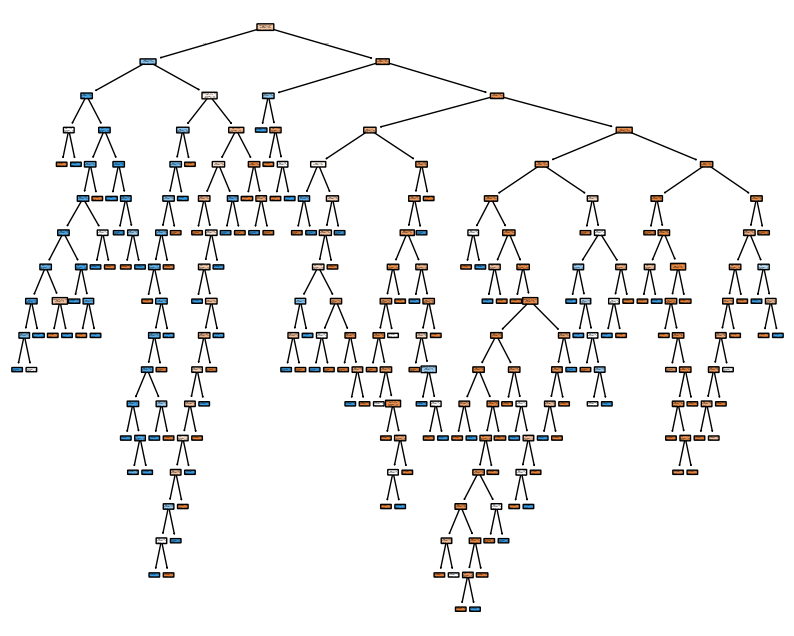

In [10]:
# Visualise unpruned tree

fig = plt.figure(figsize=(10,8))
tree.plot_tree(unpruned,feature_names = (titanic_df.columns[2:12]),
                     rounded = True, proportion = False, precision = 2, filled = True) 
plt.show

In [11]:
# Accuracy and depth of development set

print("Accuracy without pruning on development set:", unpruned.score(X_dev, y_dev))
print("At depth:", unpruned.tree_.max_depth)

Accuracy without pruning on development set: 0.7482517482517482
At depth: 17


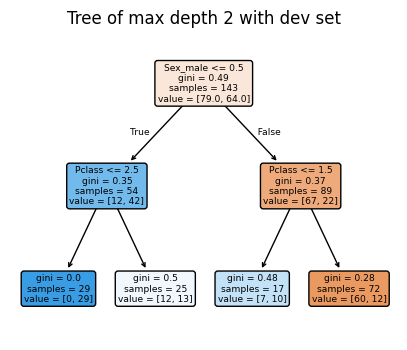

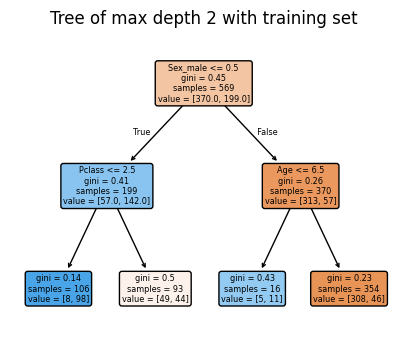

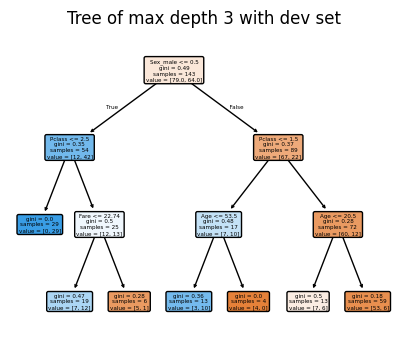

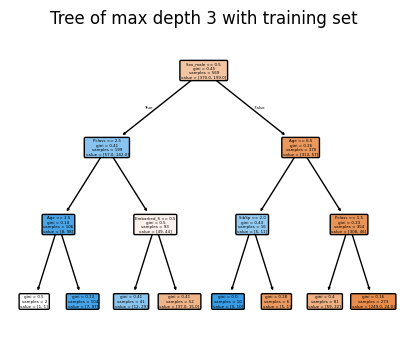

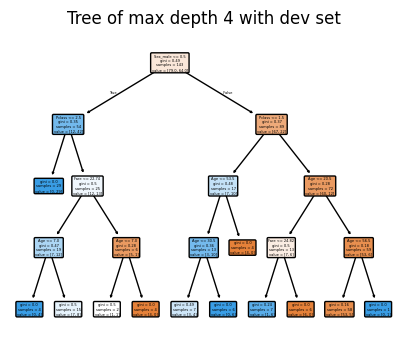

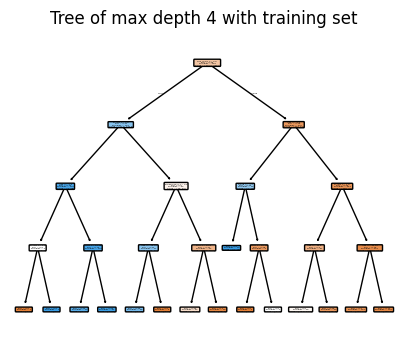

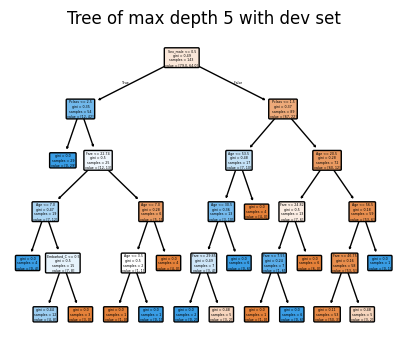

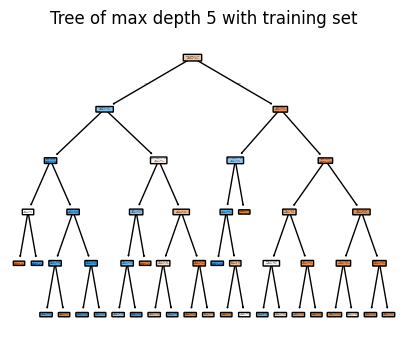

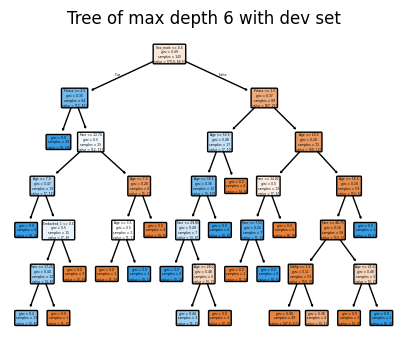

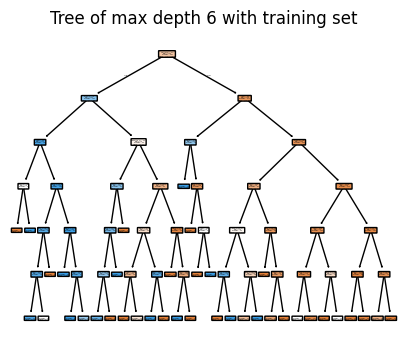

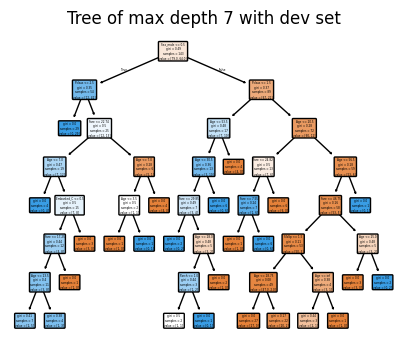

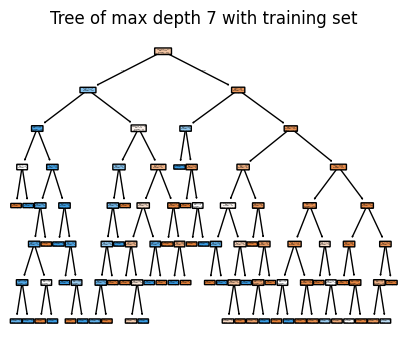

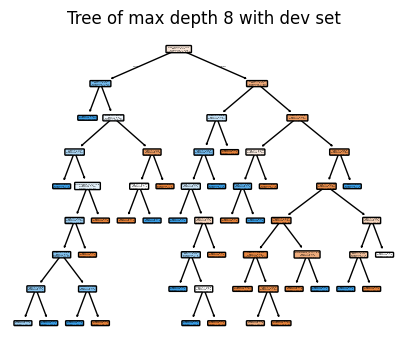

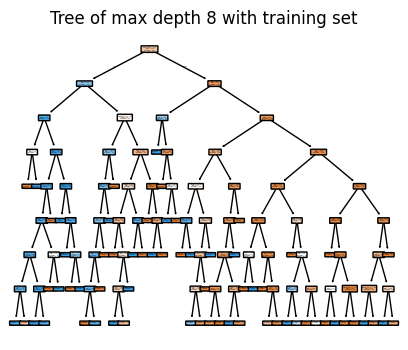

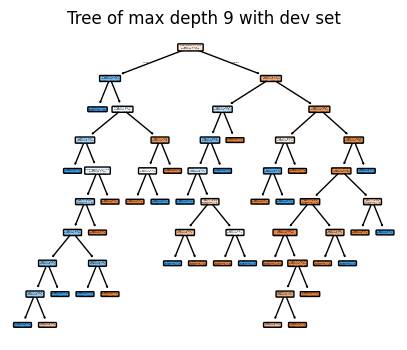

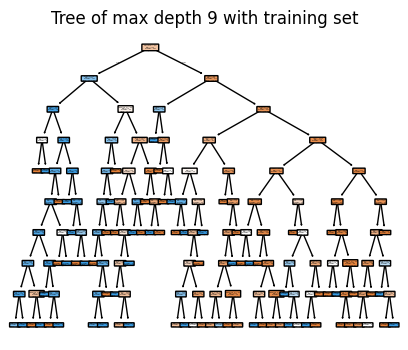

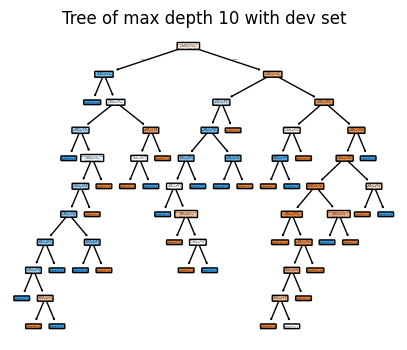

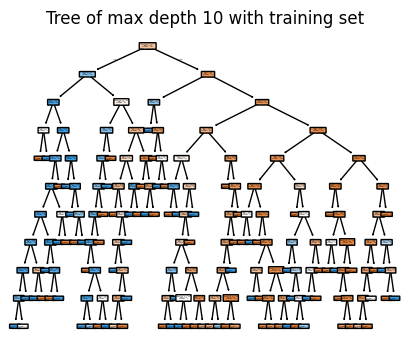

In [12]:
# Looking at effect of pruning with depth ranges 2-10 
pruned_depths = range(2,11)

pruned_scores_dev= [] 
pruned_scores_train= []

for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)

  # Development model
  clf.fit(X_dev, y_dev)
  score = clf.score(X_test, y_test)
  pruned_scores_dev.append(score)

  fig = plt.figure(figsize=(5,4))
  tree.plot_tree(clf,feature_names = (titanic_df.columns[2:12]),
                     rounded = True, proportion = False, precision = 2, filled = True) 
  plt.title(f"Tree of max depth {d} with dev set")

  # Training model
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores_train.append(score)
   
  fig = plt.figure(figsize=(5,4))
  tree.plot_tree(clf,feature_names = (titanic_df.columns[2:12]),
                     rounded = True, proportion = False, precision = 2, filled = True) 
  plt.title(f"Tree of max depth {d} with training set")
  
      

The training and development sets create different trees as seen above

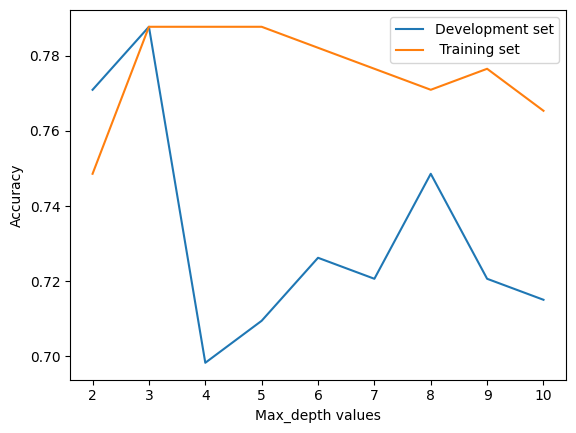

In [13]:
# Fit both training and development set accuracies with varying depths on plot
fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores_dev, label = 'Development set')
ax.plot(pruned_depths, pruned_scores_train, label =' Training set')
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.legend()
ax.xaxis.set_ticks(pruned_depths)
plt.show()

The plot above shows that maximum accuracy is reached with a max depth of 3. The training set accuracy stays at this consistent level no matter how
high the max depth gets. The development set loses accuracy over a depth of 3 and varies greatly between 4-10.

Accuracy of final model on test set: 0.7877094972067039


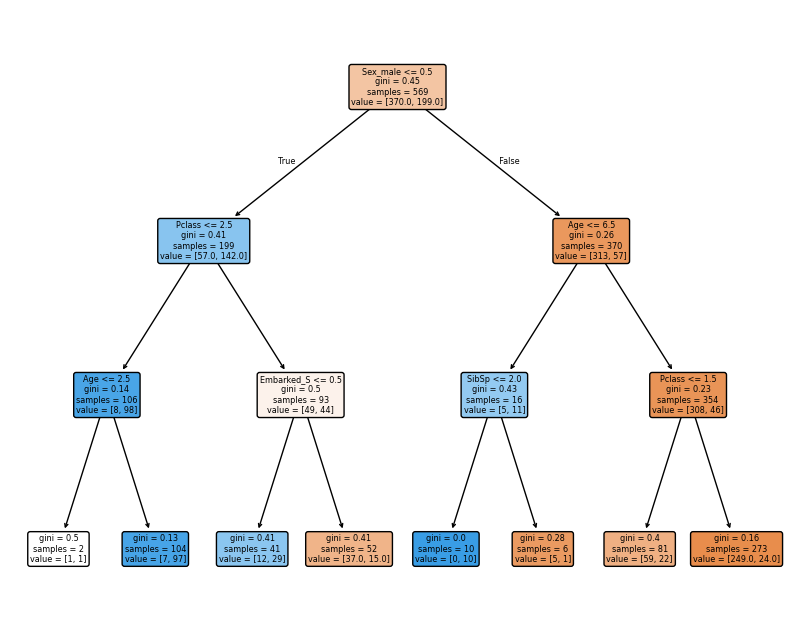

In [14]:
# Final model a depth 3

final_model = DecisionTreeClassifier(max_depth=3, random_state=r)
final_model.fit(X_train, y_train)

# Show tree

fig = plt.figure(figsize=(10,8))
tree.plot_tree(final_model,feature_names = (titanic_df.columns[2:12]),
                     rounded = True, proportion = False, precision = 2, filled = True) 
plt.show

# Accuracy of final model

print("Accuracy of final model on test set:", final_model.score(X_test, y_test))

Accuracy of final model is 0.788

In [15]:

# Create bagged model

bagged = BaggingClassifier(estimator=final_model, n_estimators=100, random_state=r)

bagged.fit(X_train,y_train)

print("Accuracy bagged:",bagged.score(X_test, y_test))

# Create random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=r)
forest.fit(X_train, y_train)
print("Accuracy random forest:",forest.score(X_test, y_test))

# Creating a booster model- Not mentioned in any of the training material. The example code had the module ADAboost imported however
# when I tried to use this model it was unable to function due to NaN values in the data set. I used HistGradientBoostingCLassifier instead as recommended
# by skikit-learns documentation
boosted = HistGradientBoostingClassifier(learning_rate=1,random_state=r)
boosted.fit(X_train, y_train)
print("Accuracy boosted model:",boosted.score(X_test, y_test))


Accuracy bagged: 0.7821229050279329
Accuracy random forest: 0.7932960893854749
Accuracy boosted model: 0.7877094972067039


The random forest model has the best accuracy

In [16]:
# See which features of random forest model are most important
feature_imp = pd.Series(forest.feature_importances_, 
                        index=X_train.columns).sort_values(ascending=False)

feature_imp

Age           0.248484
Fare          0.238371
Sex_male      0.152779
Sex_female    0.145926
Pclass        0.079166
SibSp         0.047706
Parch         0.044440
Embarked_S    0.019424
Embarked_C    0.014912
Embarked_Q    0.008793
dtype: float64

Age is the most important feature in determining suvival rate

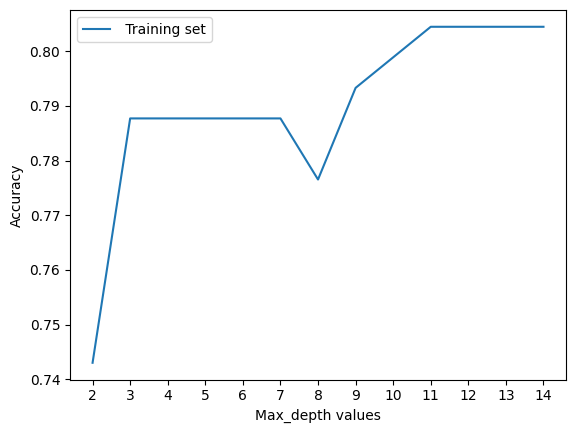

In [17]:
# Tune max_depth for random forest model

# Looking at effect of pruning with depth ranges 2-15
pruned_depths = range(2,15)

pruned_scores_train= []

for d in pruned_depths:
  forest = RandomForestClassifier(n_estimators=100, random_state=r, max_depth=d)

  # Training model
  forest.fit(X_train, y_train)
  score = forest.score(X_test, y_test)
  pruned_scores_train.append(score)

  
# Fit both training set accuracies with varying depths on plot
fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores_train, label =' Training set')
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.legend()
ax.xaxis.set_ticks(pruned_depths)
plt.show()



Max accuracy reached at a depth of 11

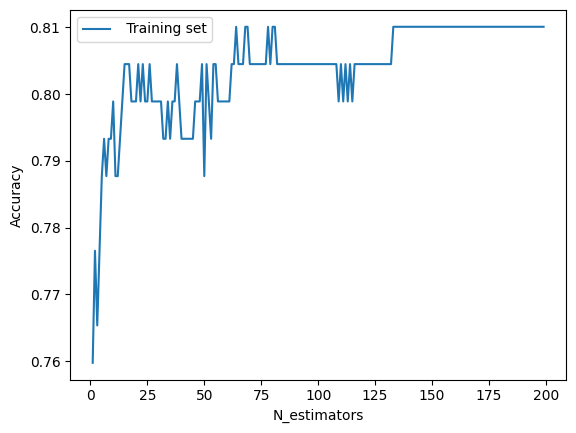

In [18]:
# Tune n estimators for the random forest model with max depth of 11
n_estimators = range(1,200)

estimator_scores= []

for n in n_estimators:
  forest = RandomForestClassifier(n_estimators=n, random_state=r, max_depth=11)

  # Training model
  forest.fit(X_train, y_train)
  score = forest.score(X_test, y_test)
  estimator_scores.append(score)

  
# Fit training set accuracies with varying n_estimators
fig, ax = plt.subplots()
ax.plot(n_estimators, estimator_scores, label =' Training set')
plt.xlabel("N_estimators")
plt.ylabel("Accuracy")
ax.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()


Maximum accuracy reached at 150 n_estimators

In [19]:
# Create a bagged model
bagged = BaggingClassifier(estimator=final_model, n_estimators=150, random_state=r)

bagged.fit(X_train,y_train)

print("Accuracy bagged:",bagged.score(X_test, y_test))

# Create random forest model
forest = RandomForestClassifier(n_estimators=150, random_state=r, max_depth= 11)
forest.fit(X_train, y_train)
print("Accuracy random forest:",forest.score(X_test, y_test))
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))


# Create a boosted model
boosted = HistGradientBoostingClassifier(learning_rate=1,random_state=r, max_depth=11)
boosted.fit(X_train, y_train)
print("Accuracy boosted model:",boosted.score(X_test, y_test))
y_pred = boosted.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy bagged: 0.7821229050279329
Accuracy random forest: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       100
           1       0.87      0.67      0.76        79

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179

Accuracy boosted model: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.84      0.71      0.77        79

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



The random forest model and boosted model had the best results. I printed classification table shows that they gave very similar results with a max depth of 11 and n_estimators of 150 for the random forest however the recall and f1_scores are marginally better for the boosted model.